<a href="https://colab.research.google.com/github/yschimpf/feedback_alignment/blob/main/code/backpropagtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [6]:
class NeuralNetwork(object):
  #layers include input and output layer, activiation allows for an activation
  #to allow for f.e. softmax in case of application
  def __init__(self, layers = [2,10,1], activations = ['sigmoid','identity'], loss = 'MSE'):
    assert(len(layers) == len(activations)+1)
    self.layers = layers
    self.activations = activations
    self.loss = loss
    self.weights = []
    self.biases = []
    #fill the matrices with random values
    for i in range (len(layers)-1):
      self.weights.append(np.random.randn(layers[i+1], layers[i]))
      self.biases.append(np.random.randn(layers[i+1], 1))

    # computation of all unit inputs and activations fpr all layers
  def feedforward(self, x):
    #first layer has no activation function
    v = np.copy(x)
    z_s = []
    v_s = [v]
    #for all other leayers compute the weighted inputs of last layer units
    #and apply activations. Last layer has activation to f.e. apply softmax
    for i in range(len(self.weights)):
      activation = self.getActivationFunction(self.activations[i])
      #print(i)
      #print(self.weights[i].shape)
      #print(v.shape)
      z_s.append(self.weights[i].dot(v)+self.biases[i])
      v = activation(z_s[-1])
      v_s.append(v)
    return (z_s, v_s)


  #gets labels and feedforward data
  #returns derivatives w.r.t. weight matrices
  def backpropagation(self, y, z_s, v_s):
    #derivatives with respect to the weighs
    dw = []
    #error backprogated through the layers i.e. dL/dz i.e. error
    #in terms of inputs to the respective layer
    deltas = [None]*len(self.weights)
    #error in terms of inputs of last layer
    deltas[-1] = (self.getDerivativeLoss(self.loss)(v_s[-1], y)) * (self.getDerivativeActivation(self.activations[-1])(z_s[-1]))
    #actual backpropagation
    for i in reversed(range(len(deltas)-1)):
      #compute dL/dz for each layer that is the loss in terms of the inputs of the activation
      deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivativeActivation(self.activations[i])(z_s[i]))
    batch_size = y.shape[1]
    #compute dL/dw for all weight matrices
    dw = [d.dot(v_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
    #compute dL/db for all biases
    db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for i,d in enumerate(deltas)]
    return dw, db

  #train netowrk on the training data
  def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
    for e in range (epochs):
      i = 0
      while(i < len(y)):
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        i = i+batch_size
        z_s, v_s = self.feedforward(x_batch)
        dw, db = self.backpropagation(y_batch, z_s, v_s)
        self.weights = [w - lr*dweight for w,dweight in zip(self.weights, dw)]
        self.biases = [b - lr*dbias for b,dbias in zip(self.biases, db)]
        print("loss ={}".format(np.linalg.norm(v_s[-1]-y_batch)))

  #definition of nonlinearities for units
  @staticmethod
  def getActivationFunction(name):
    if(name == 'sigmoid'):
      return lambda x : np.exp(x)/(1+np.exp(x))
    elif(name == 'identity'):
      return lambda x : x
    elif(name == 'relu'):
      def relu(x):
        y = np.copy(x)
        if(y<0):
          return 0
        else:
          return y
      return relu
    else:
      print('Unknown activation function. Identity is used')
      return lambda x:x

  #derivative of activation
  @staticmethod
  def getDerivativeActivation(name):
    if(name == 'sigmoid'):
      sigmoid = lambda x : np.exp(x)/(1+np.exp(x))
      return lambda x : sigmoid(x)*(1-sigmoid(x))
    elif(name == 'identity'):
      return lambda x : 1
    elif(name == 'relu'):
      def drelu(x):
        y = np.copy(x)
        if(y >= 0): y = 1
        else: y = 0
        return y
      return drelu
    else:
      print('Unknown activation, identity was used instead')
      return lambda x:1


  #derivative of loss
  @staticmethod
  def getDerivativeLoss(name):
    #compute derivative of MSE for formula L = 1/2 sum_{i}(f_i - y_i)^2 w.r.t. f_i
    #where i sums over the samples, f_i is the network output and y-i the label
    if(name == 'MSE'):
      return lambda f, y : (f-y)
    #without a specified loss computing a loss does not really make sense
    else:
      print('Unknown loss, cannot make useful computations')
      exit()


loss =60.95505508424
loss =43.70621509844604
loss =38.312366922797
loss =36.18147704345628
loss =34.8526297083989
loss =33.735565791617034
loss =32.69557311255009
loss =31.701418315649615
loss =30.74515218073795
loss =29.824166422507815
loss =28.93716752762977
loss =28.08325288331424
loss =27.261681512563033
loss =26.471803171756655
loss =25.713025934233524
loss =24.984795109777284
loss =24.286577076775853
loss =23.61784629255804
loss =22.97807484490933
loss =22.36672418820283
loss =21.783238794725996
loss =21.227041489582987
loss =20.697530261250932
loss =20.19407635895671
loss =19.716023505260914
loss =19.262688068257663
loss =18.83336005259281
loss =18.42730478183851
loss =18.04376515644189
loss =17.681964381423857
loss =17.341109066338735
loss =17.02039260696148
loss =16.71899876410026
loss =16.436105360246586
loss =16.17088801988217
loss =15.92252388452423
loss =15.690195239286794
loss =15.473092994038458
loss =15.270419969203976
loss =15.081393943839393
loss =14.905250431666651
l

<function matplotlib.pyplot.show(close=None, block=None)>

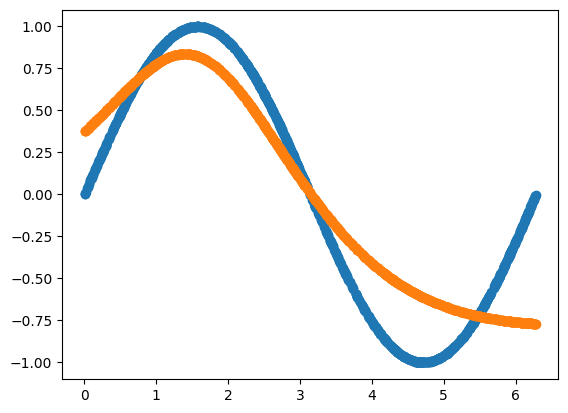

In [8]:
#first testrun
import matplotlib.pyplot as plt
nn = NeuralNetwork([1,20,100,1], activations = ['sigmoid', 'sigmoid','identity'], loss = 'MSE')
X = 2 * np.pi * np.random.rand(1000).reshape(1,-1)
y = np.sin(X)
nn.train(X,y,epochs=1000,batch_size = 64, lr = 0.01)
_,v_s= nn.feedforward(X)
print(y,X)
plt.scatter(X.flatten(), y.flatten())
plt.scatter(X.flatten(),v_s[-1].flatten())
plt.show

In [5]:
#testing stuff
arr = np.array([1,2,3,4])
print(arr[-1])

4
